<a href="https://colab.research.google.com/github/davidmuna/Nairobi-Hospital-Clinical-Hypothyroidism-Camp/blob/main/Hypothyroid_Classification_David_Muna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Decision Trees and Support Vector Machines

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist working for Nairobi Hospital on a clinical camp conducted to test for hypothyroidism, I'm required to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.The data collected focused on Thyroid patients.

### b) Defining the Metric for Success


To conduct the following and predict whether or not the patient's symptoms indicate that the patient has hypothyroidism. This will be achieved using the following classificaion models;

*   Random forests
*   gradient boosted trees
*   Support Vector Machines

The Metrics from the three models are the accuracy score and gini index. A high accuracy score, high information gain and less overfitting is our success criteria.



### d) Recording the Experimental Design


*   Part 1: Decision Trees Modelling using;
    1.   Random Forests
    2.   Gradient Boosted Trees 
    3.   Hyperparameter Tuning and model comparison
   
*   Part 2: SVM Modelling
    1.   Data Preparation
    2.   Apply Polynomial, linear and rbf kernel function on SVM model 
    3.   Hyperparameter Tuning and model comparison


### e) Data Relevance

The data will be considered relevant once the metrics of succes have been computed and our solution challenged.

## 2. Reading the Data

In [150]:
# loading and previewing the Dataset
#Loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
%matplotlib inline

data = pd.read_csv('http://bit.ly/hypothyroid_data')

## 3. Checking the Data

In [99]:
#Shape of datasets
print(data.shape)

(3163, 26)


In [100]:
# Previewing the top of our dataset
data.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


In [101]:
#Previewing the bottom
data.tail(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [102]:
# Checking column datatypes
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset



In [103]:
#Checking number of unique values
data.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [104]:
# Checking for Anomalies

#Checking unique values in sex and status columns
print("status", data['status'].unique())
print("sex", data['sex'].unique())

status ['hypothyroid' 'negative']
sex ['M' 'F' '?']


In [105]:
#Checking for he count of records with ? marks and whether their respective test was taken to determine how to deal with them

#TBG
print("TBG_measured", data.groupby('TBG_measured').count())
print("TBG", data.groupby('TBG').count())

#The number of tests not taken equals the number of missing records
#This column has 2903 missing records hence, hence we'll replace missing values with zero
#so we can covert the dataypes to numerical later on

TBG_measured               status   age   sex  on_thyroxine  ...   T4U  FTI_measured   FTI   TBG
TBG_measured                                    ...                                
n               2903  2903  2903          2903  ...  2903          2903  2903  2903
y                260   260   260           260  ...   260           260   260   260

[2 rows x 25 columns]
TBG       status   age   sex  on_thyroxine  ...   T4U  FTI_measured   FTI  TBG_measured
TBG                                     ...                                        
0          1     1     1             1  ...     1             1     1             1
108        4     4     4             4  ...     4             4     4             4
11         1     1     1             1  ...     1             1     1             1
110        5     5     5             5  ...     5             5     5             5
12         1     1     1             1  ...     1             1     1             1
122        1     1     1            

In [106]:
#FTI
print("FTI_measured", data.groupby('FTI_measured').count())
print("FTI", data.groupby('FTI').count()) #The number of tests not taken equals the number of missing records

FTI_measured               status   age   sex  on_thyroxine  ...   T4U   FTI  TBG_measured   TBG
FTI_measured                                    ...                                
n                247   247   247           247  ...   247   247           247   247
y               2916  2916  2916          2916  ...  2916  2916          2916  2916

[2 rows x 25 columns]
FTI       status  age  sex  on_thyroxine  ...  T4U  FTI_measured  TBG_measured  TBG
FTI                                   ...                                      
0          9    9    9             9  ...    9             9             9    9
1.40       1    1    1             1  ...    1             1             1    1
10         7    7    7             7  ...    7             7             7    7
100       44   44   44            44  ...   44            44            44   44
101       34   34   34            34  ...   34            34            34   34
...      ...  ...  ...           ...  ...  ...           ...    

In [107]:
#T4U
print("T4U_measured", data.groupby('T4U_measured').count())
print("T4U", data.groupby('T4U').count())
#The number of tests not taken equals the number of missing records

T4U_measured               status   age   sex  ...   FTI  TBG_measured   TBG
T4U_measured                      ...                          
n                248   248   248  ...   248           248   248
y               2915  2915  2915  ...  2915          2915  2915

[2 rows x 25 columns]
T4U       status  age  sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
T4U                                   ...                                      
0          2    2    2             2  ...             2    2             2    2
0.20       1    1    1             1  ...             1    1             1    1
0.27       1    1    1             1  ...             1    1             1    1
0.28       6    6    6             6  ...             6    6             6    6
0.29       3    3    3             3  ...             3    3             3    3
...      ...  ...  ...           ...  ...           ...  ...           ...  ...
2          1    1    1             1  ...             1    1    

In [108]:
#TT4
print("TT4_measured", data.groupby('TT4_measured').count())
print("TT4", data.groupby('TT4').count())
#The number of tests not taken equals the number of missing records

TT4_measured               status   age   sex  ...   FTI  TBG_measured   TBG
TT4_measured                      ...                          
n                249   249   249  ...   249           249   249
y               2914  2914  2914  ...  2914          2914  2914

[2 rows x 25 columns]
TT4      status  age  sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
TT4                                  ...                                      
10        8    8    8             8  ...             8    8             8    8
100      28   28   28            28  ...            28   28            28   28
101      41   41   41            41  ...            41   41            41   41
102      35   35   35            35  ...            35   35            35   35
103      37   37   37            37  ...            37   37            37   37
..      ...  ...  ...           ...  ...           ...  ...           ...  ...
96       35   35   35            35  ...            35   35            3

In [109]:
#T3
print("T3_measured", data.groupby('T3_measured').count())
print("T3", data.groupby('T3').count())
#The number of tests not taken equals the number of missing records

T3_measured              status   age   sex  ...   FTI  TBG_measured   TBG
T3_measured                      ...                          
n               695   695   695  ...   695           695   695
y              2468  2468  2468  ...  2468          2468  2468

[2 rows x 25 columns]
T3       status  age  sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
T3                                    ...                                      
0          1    1    1             1  ...             1    1             1    1
0.05       2    2    2             2  ...             2    2             2    2
0.10       4    4    4             4  ...             4    4             4    4
0.20      19   19   19            19  ...            19   19            19   19
0.30      23   23   23            23  ...            23   23            23   23
...      ...  ...  ...           ...  ...           ...  ...           ...  ...
8.10       1    1    1             1  ...             1    1          

In [110]:
#TSH
print("TSH_measured", data.groupby('TSH_measured').count())
print("TSH", data.groupby('TSH').count())
#The number of tests not taken equals the number of missing records

TSH_measured               status   age   sex  ...   FTI  TBG_measured   TBG
TSH_measured                      ...                          
n                468   468   468  ...   468           468   468
y               2695  2695  2695  ...  2695          2695  2695

[2 rows x 25 columns]
TSH       status  age  sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
TSH                                   ...                                      
0        894  894  894           894  ...           894  894           894  894
0.01       6    6    6             6  ...             6    6             6    6
0.02       9    9    9             9  ...             9    9             9    9
0.03       8    8    8             8  ...             8    8             8    8
0.04       6    6    6             6  ...             6    6             6    6
...      ...  ...  ...           ...  ...           ...  ...           ...  ...
9.90       1    1    1             1  ...             1    1    

In [111]:
#Checking number of records
data.shape

#we'll replace all ? marks with Nan in the next cell

(3163, 26)

In [112]:
#Replacing ? marks with NaN to find the number of missing records 
final_dataset = data.replace('?', np.nan)

In [113]:
#Converting age from object to float then replacing missing values with respective median age for males and females 
#THis is more effective than just replacing missing age with overal median age of patients

#We'll replace the missing sex records with U for Unknown

final_dataset['sex'] = final_dataset['sex'].replace({ np.nan:'U'})

#Replacing Missing Ages with respective sex median age

final_dataset['age'] = final_dataset['age'].astype(float)

final_dataset['age'].fillna(final_dataset.groupby('sex')['age'].transform('median'), inplace=True)

In [114]:
#Filling the remaining missing values in the test results categories with zero for respective test not taken
final_dataset = final_dataset.replace(np.nan,0)
final_dataset.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [115]:
#Replacing the remaining missing values in the various test results with zero
final_dataset = final_dataset.fillna(0)

In [116]:
#Checking duplicates and dropping them
print("Duplicates :", final_dataset.duplicated().sum())
final_dataset.drop_duplicates(keep='first',inplace = True)
print("Duplicates :", final_dataset.duplicated().sum())
final_dataset.shape

Duplicates : 77
Duplicates : 0


(3086, 26)

In [117]:
#Plotting and Dealing with Outliers

#Converting datatypes for plotting
final_dataset['T3'] = final_dataset['T3'].astype(float)
final_dataset['TT4'] = final_dataset['TT4'].astype(float)
final_dataset['T4U'] = final_dataset['T4U'].astype(float)
final_dataset['FTI'] = final_dataset['FTI'].astype(float)
final_dataset['TSH'] = final_dataset['TSH'].astype(float)
final_dataset['TBG'] = final_dataset['TBG'].astype(float)
final_dataset['age'] = final_dataset['age'].astype(float)

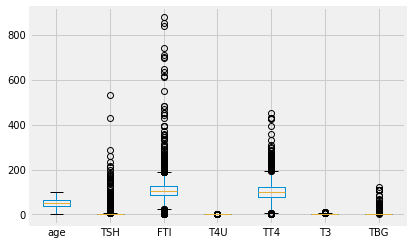

In [118]:
#Looking for outliers
boxplot = final_dataset.boxplot(column=['age', 'TSH', 'FTI','T4U','TT4','T3','TBG'])
boxplot

#The continuous columns fro test results seem to have a lot of outliers with FTI topping the list, we'll retain them since theyre too many

In [119]:
#Summary Statistics
print("Shape", final_dataset.shape)
final_dataset.describe()

Shape (3086, 26)


,age,TSH,T3,TT4,T4U,FTI,TBG
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.256643,4.952793,1.507583,100.252722,0.901850,106.582275,2.527090
std,17.920559,22.276447,1.179190,51.795700,0.339608,65.484772,10.135203
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.500000,77.000000,0.820000,85.000000,0.000000
50%,53.000000,0.400000,1.600000,100.000000,0.940000,105.000000,0.000000
75%,64.000000,1.700000,2.200000,124.000000,1.050000,126.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [120]:
#Removing Outliers using 90th percentile to prevent our model from being biased to these points
lowerquantile = final_dataset.quantile(0.10)
upperquantile = final_dataset.quantile(0.90)
Range = upperquantile - lowerquantile

final_dataset = final_dataset[~((final_dataset > (upperquantile + 1.5 * Range)))]

final_dataset.isnull().sum()  

status                         0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          166
T3_measured                    0
T3                            13
TT4_measured                   0
TT4                            7
T4U_measured                   0
T4U                            1
FTI_measured                   0
FTI                           24
TBG_measured                   0
TBG                          250
dtype: int64

(2637, 26)

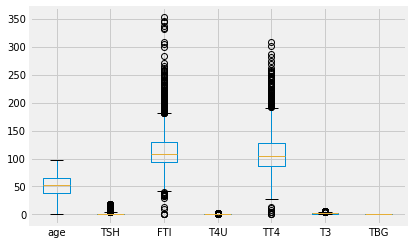

In [121]:
#Filling the missing values after removing outliers
final_dataset = final_dataset.dropna(axis = 0)
boxplot = final_dataset.boxplot(column=['age', 'TSH', 'FTI','T4U','TT4','T3','TBG'])
final_dataset.shape

## 6. Exploratory Data Analysis

In [122]:
final_dataset.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


In [123]:
#Univariate Summaries
status_sex = final_dataset.groupby(['status','sex']).size().reset_index(name = 'frequency').rename(columns = {'0':''})
status_sex

#Frequency table reveals that there are more negative cases than positive cases.
#Additionally, women are the most affected by hypothyroidism as per the number of positive cases
#The dataset is imbalanced in terms of male and female population
# U represents Unknown/not given

,status,sex,frequency
0,hypothyroid,F,22
1,hypothyroid,M,9
2,hypothyroid,U,1
3,negative,F,1748
4,negative,M,811
5,negative,U,46


In [124]:
#Count of Males and Females
#Respondents location
sex_pop = final_dataset.sex.value_counts()
sex_pop.to_frame()
sex_pop.reset_index(name = 'frequency').rename(columns = {'0':'', 'index':'sex'})

,sex,frequency
0,F,1770
1,M,820
2,U,47


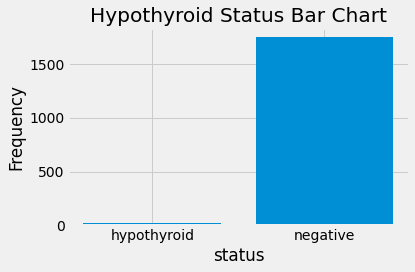

In [125]:
#PAtients Hypothyroid Status with an account bar chart

plt.style.use('fivethirtyeight')
plt.bar(status_sex['status'], status_sex['frequency'])
plt.title("Hypothyroid Status Bar Chart")
plt.xlabel("status")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#The bar for positive status indicates how the dataset is biased towards negative status

No handles with labels found to put in legend.


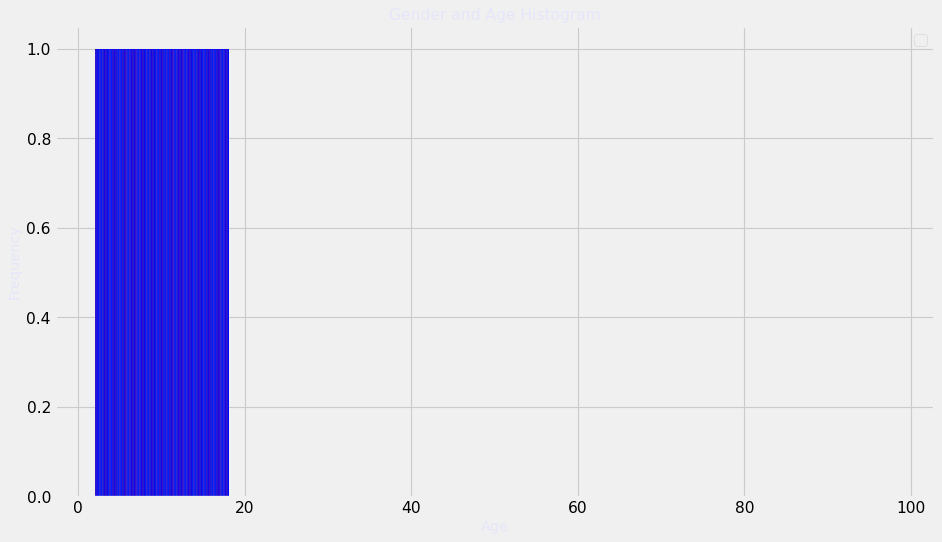

In [126]:
#Creating male, female and unknown variables

male = final_dataset[['sex']] == 'M'
female = final_dataset[['sex']] == 'F'
unknown = final_dataset[['sex']] == 'U'

#Plotting a Histogram Distribution plot

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

bins = [0,20,40,60,80,100]
plt.figure(figsize=(12,7), dpi= 80)
plt.hist(female,bins = bins, edgecolor ='green' )
plt.hist(male,bins = bins, edgecolor ='red' )
plt.hist(unknown,bins = bins, edgecolor ='blue' )
plt.title("Gender and Age Histogram", fontsize = 14, color = 'lavender')
plt.xlabel("Age", fontsize = 13, color = 'lavender')
plt.ylabel("Frequency", fontsize = 13, color = 'lavender')
plt.tight_layout()
plt.legend()
plt.show()

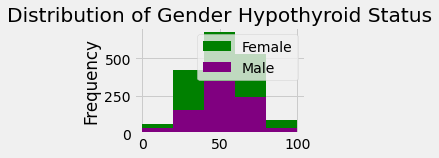

In [127]:
#Plotting Histogram Distribution of status based on sex

fig = plt.figure()

#Setting figure size
plt.rcParams['figure.figsize'] = [15,10]

#Creating dictionaries of parameters
fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

#Plotting two subplots superimposed into one

ax1 = fig.add_subplot(221)
ax1.hist('age', bins=bins, label = 'Female', data=final_dataset[final_dataset['sex']=='F'], color="green")
ax1.set_title('Distribution of Gender Hypothyroid Status', color="black")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2 = fig.add_subplot(221)
ax2.hist('age', bins=bins, label = 'Male', data=final_dataset[final_dataset['sex']=='M'], color="purple")
ax2.set_title('Distribution of Gender Hypothyroid Status', color="black")
ax2.set_ylabel("Frequency")
ax2.legend()

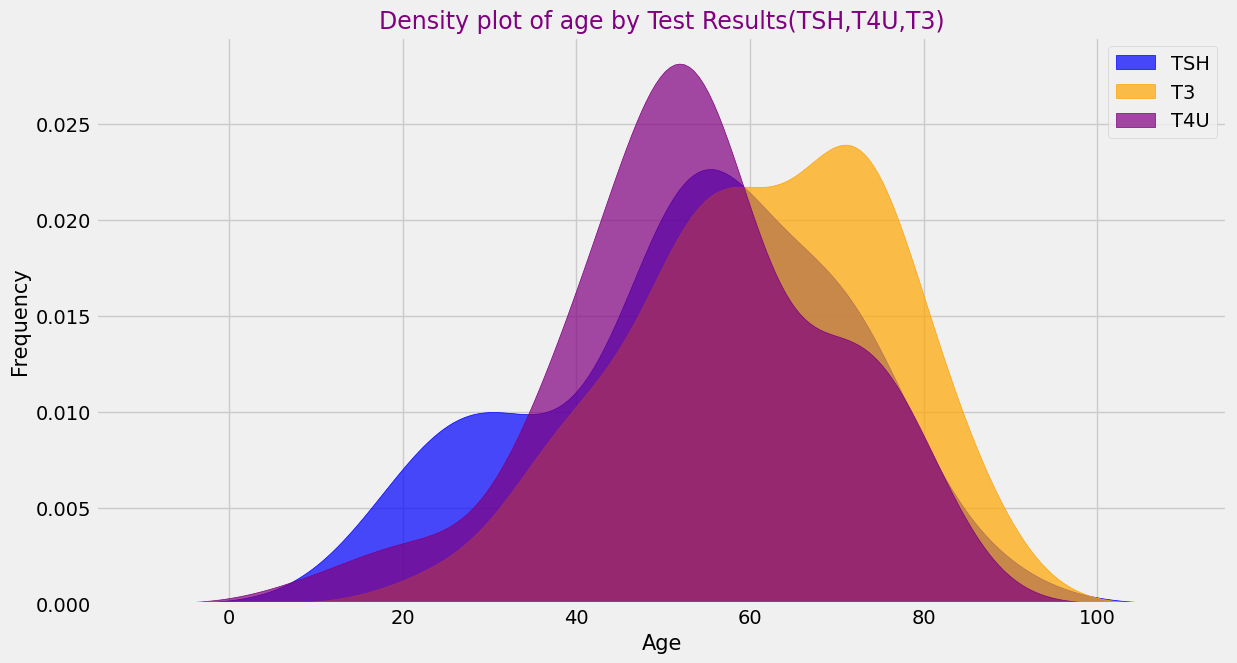

In [128]:
#Plotting Distribution of continuous variables
dataset = final_dataset[['TBG','T3','TT4','T4U','FTI','TSH','age']]
#Converting continuous features to float
dataset['TBG'] = dataset['TBG'].astype(float)
dataset['T3'] = dataset['T3'].astype(float)
dataset['TT4'] = dataset['TT4'].astype(float)
dataset['T4U'] = dataset['T4U'].astype(float)
dataset['FTI'] = dataset['FTI'].astype(float)
dataset['TSH'] = dataset['TSH'].astype(float)
dataset['age'] = dataset['age'].astype(float)

#Kernel Density Estimate plots for some test results continuous variables

import warnings
warnings.filterwarnings(action = 'ignore')

plt.figure(figsize=(13,7), dpi= 100)
sns.kdeplot(dataset.loc[dataset['TSH'] == True, "age"], shade=True, color="blue", label="TSH", alpha=0.7)
sns.kdeplot(dataset.loc[dataset['T3'] == True, "age"], shade=True, color="orange", label="T3", alpha=0.7)
sns.kdeplot(dataset.loc[dataset['T4U'] == True, "age"], shade=True, color="purple", label="T4U", alpha=0.7)
plt.title('Density plot of age by Test Results(TSH,T4U,T3)', fontsize=17, color = 'purple')
plt.xlabel('Age', fontsize = 15, color = 'k')
plt.ylabel('Frequency', color = 'k', fontsize = 15)
plt.legend()
plt.show()

#Plot shows that middle aged people are prone to getting higher test results

## A. Decision Trees

#### Random Forest Classifier

In [129]:
#Variable for categorical features exclusing sex since it has mising values
#Sex will be 
cols_cat = ['status','sex','on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']

#Variable for continuous features
cols_con = ['age','T3','TT4','T4U','FTI','TSH','TBG']

#Categorising categorical features and converting to numerical
df_cat = final_dataset[cols_cat]
df_cat = df_cat.astype('category')
df_cat['sex'] = df_cat['sex'].cat.codes
df_cat['status'] = df_cat['status'].cat.codes
df_cat['on_thyroxine'] = df_cat['on_thyroxine'].cat.codes
df_cat['query_on_thyroxine'] = df_cat['query_on_thyroxine'].cat.codes
df_cat['on_antithyroid_medication'] = df_cat['on_antithyroid_medication'].cat.codes
df_cat['thyroid_surgery'] = df_cat['thyroid_surgery'].cat.codes
df_cat['query_hypothyroid'] = df_cat['query_hypothyroid'].cat.codes
df_cat['query_hyperthyroid'] = df_cat['query_hyperthyroid'].cat.codes
df_cat['pregnant'] = df_cat['pregnant'].cat.codes
df_cat['sick'] = df_cat['sick'].cat.codes
df_cat['tumor'] = df_cat['tumor'].cat.codes
df_cat['lithium'] = df_cat['lithium'].cat.codes
df_cat['goitre'] = df_cat['goitre'].cat.codes
df_cat['TSH_measured'] = df_cat['TSH_measured'].cat.codes
df_cat['T3_measured'] = df_cat['T3_measured'].cat.codes
df_cat['TT4_measured'] = df_cat['TT4_measured'].cat.codes
df_cat['T4U_measured'] = df_cat['T4U_measured'].cat.codes
df_cat['FTI_measured'] = df_cat['FTI_measured'].cat.codes
df_cat['TBG_measured'] = df_cat['TBG_measured'].cat.codes

#Creating df_con for continuous features
df_con = final_dataset[cols_con]

#Merging df_cat and df_con
final_dataset2 = pd.concat([df_cat,df_con], axis=1)

In [130]:
#Converting continuous features to int
final_dataset2['TBG'] = final_dataset2['TBG'].astype(float)
final_dataset2['T3'] = final_dataset2['T3'].astype(float)
final_dataset2['TT4'] = final_dataset2['TT4'].astype(float)
final_dataset2['T4U'] = final_dataset2['T4U'].astype(float)
final_dataset2['FTI'] = final_dataset2['FTI'].astype(float)
final_dataset2['TSH'] = final_dataset2['TSH'].astype(float)
final_dataset2['age'] = final_dataset2['age'].astype(float)

In [131]:
#Splitting rf_dataset1 for modelling

X = final_dataset2.drop(columns = ['status'])
y = final_dataset2['status']


#Using 80% of data for training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
# The random_state variable is here to guarantee that we see the same numbers.

In [132]:
#Creating our Random Forest Classifier

forest = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# And now check and evaluate metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9867424242424242
Mean Squared Error: 0.013257575757575758
Root Mean Squared Error: 0.11514154661795957
[[  0   7]
 [  0 521]]


In [133]:
#Setting up Hyperparameters

# base model is forest
# Create the parameter grid 

paramsRF = {
    'bootstrap': [True, False],
    'random_state' : [0,100],
    'max_depth': [10,50,100],
    'min_samples_split': [25, 30, 35],
    'max_features' : ['auto', 'sqrt','log2'],
    'n_estimators': [100, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = paramsRF, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [134]:
#Fitting the best parameters
grid_search.fit(X_train, y_train)
paramsRF = grid_search.best_params_
paramsRF
#Returns
#{'bootstrap': True,
#'max_depth': 10,
#'max_features': 'auto',
 #'min_samples_split': 25,
 #n_estimators': 100,
 #'random_state': 0}

Fitting 2 folds for each of 324 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  2.8min finished


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 30,
 'n_estimators': 200,
 'random_state': 0}

In [135]:
#Fitting Best Params obtained above

forest = RandomForestClassifier(**paramsRF)
forest = forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# And now check and evaluate metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

new_accuracy = metrics.accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
forest_accuracy = 0.9867424242424242  #From forest predictions
print('Accuracy Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - forest_accuracy) / forest_accuracy))

Accuracy: 0.9886363636363636
Mean Squared Error: 0.011363636363636364
Root Mean Squared Error: 0.10660035817780522
[[  1   6]
 [  0 521]]
Accuracy Improvement of 0.19%.


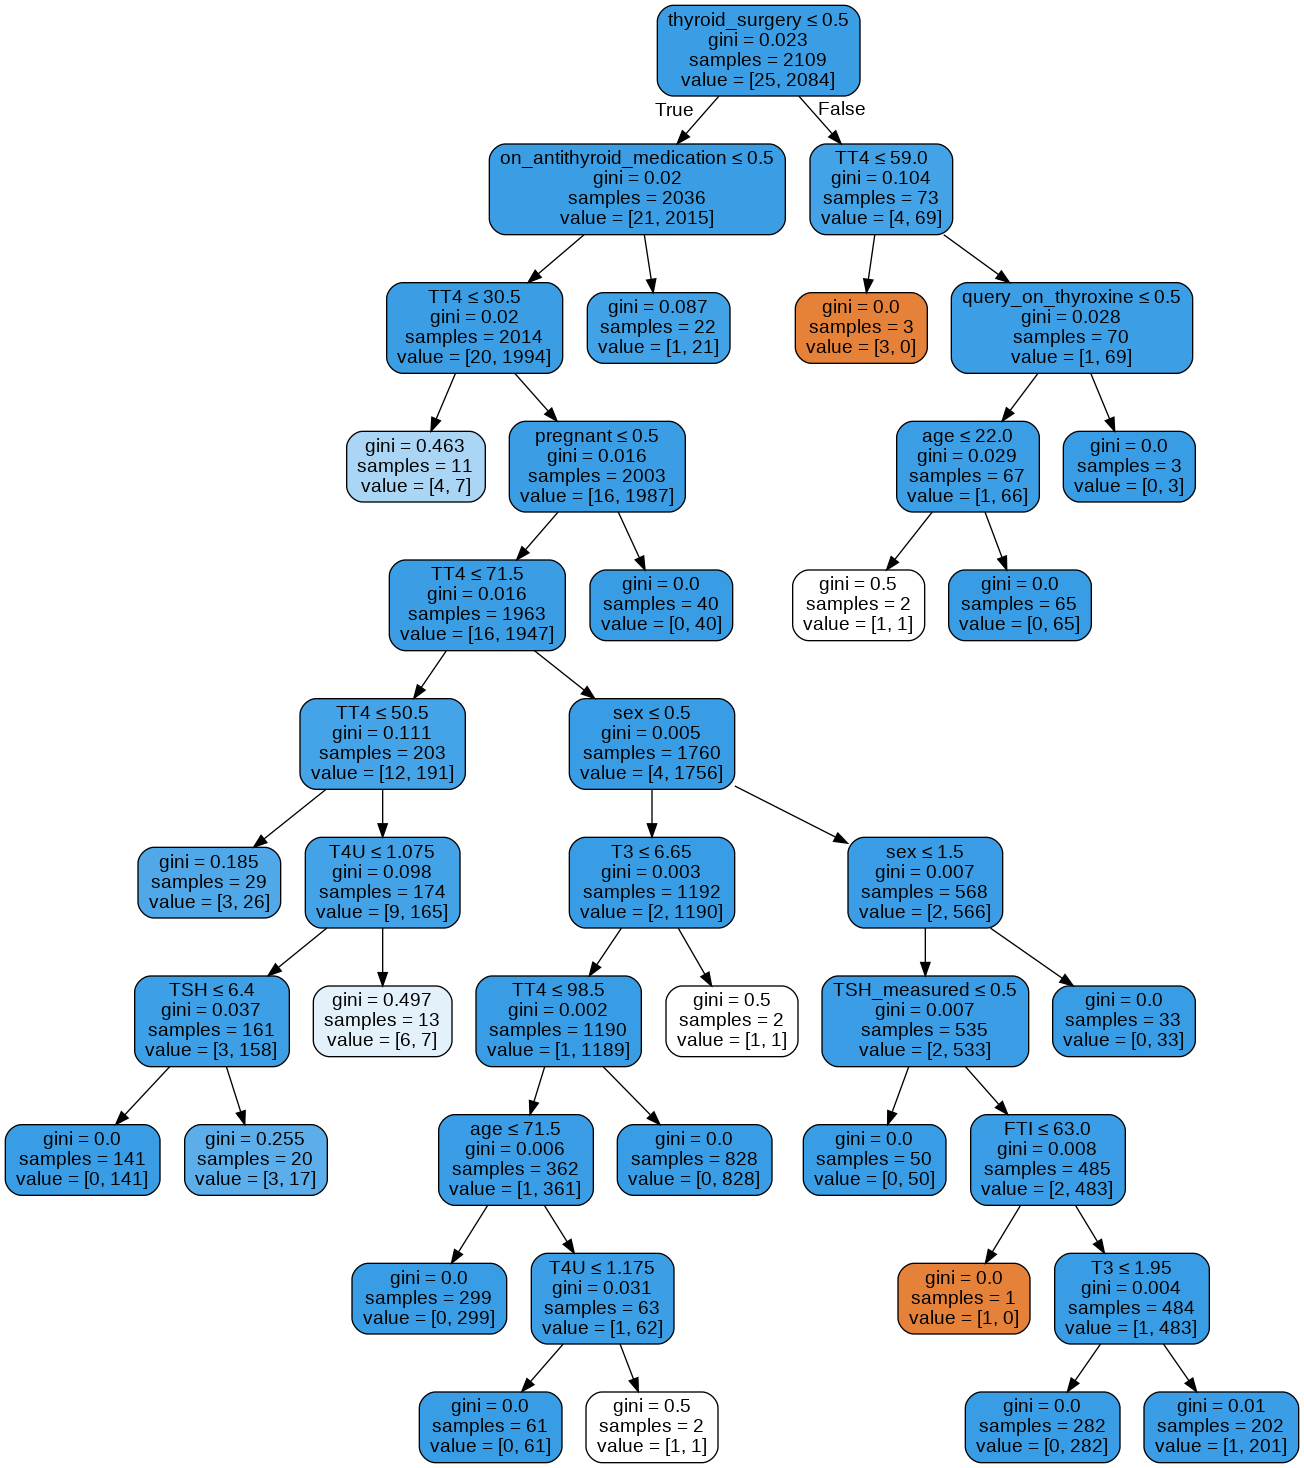

In [136]:
#Visualising the 25th decision tree
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

tree = forest.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#We might need to reduce the depth of the trees since the gini value is already approaching Zero at fewer depths

No handles with labels found to put in legend.


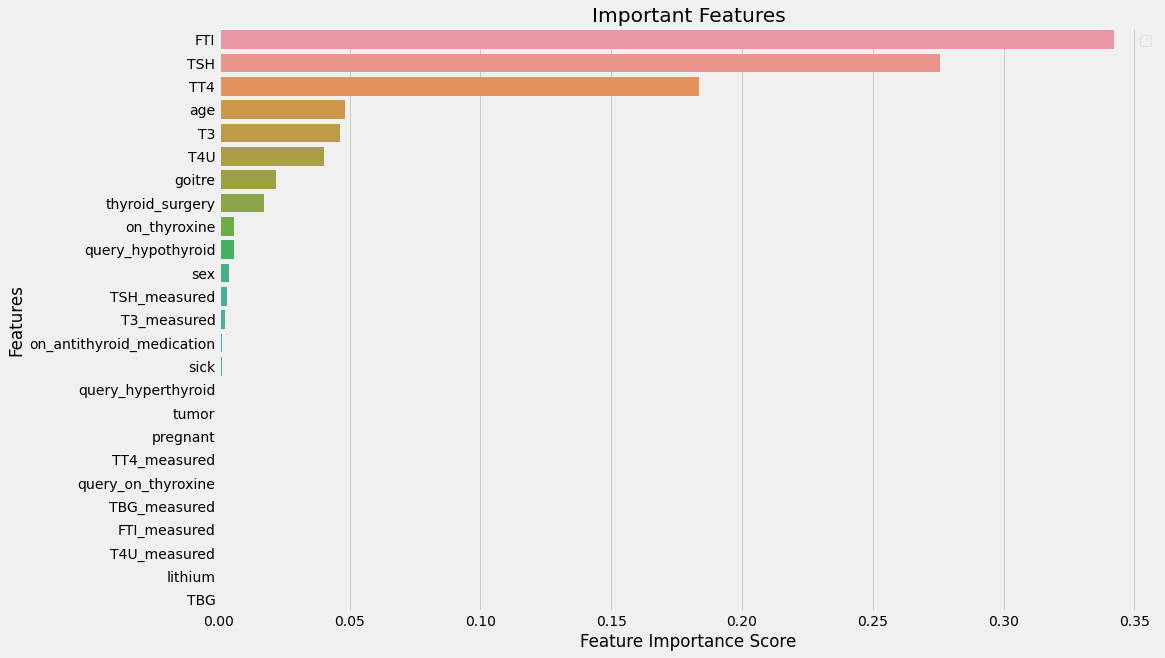

In [137]:
#FEATURE IMPORTANCE
#creating Feature variable
feature_imp = pd.Series(forest.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()

#The three most important Features as per the graph below are FTI, TSH and TT4

##### Gradient Boosting

In [138]:
#GRADIENT BOOSTED CLASSIFIER

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=2)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X)

# And now we assess and evaluate metrics 
print("Accuracy:",metrics.accuracy_score(y,y_pred_gbc)) 
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_gbc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_gbc)))
print(confusion_matrix(y, y_pred_gbc))

new_accuracy = metrics.accuracy_score(y, y_pred_gbc)
print('Model Accuracy Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - forest_accuracy) / forest_accuracy))

Accuracy: 0.9981039059537353
Mean Squared Error: 0.0018960940462646946
Root Mean Squared Error: 0.04354416202276368
[[  28    4]
 [   1 2604]]
Model Accuracy Improvement of 1.15%.


The Models seem to be overfitting. To reduce this, I will reduce the learning rate to less than 0.1 and also penalise the max_depth used from 10 to 5 based on intuition.

In [139]:
#Grid Search to find Best Parameters for Gradient Boosting

# Create the parameter grid 

paramsGD = {
    'learning_rate': [0.1,0.2,0.3],
    'random_state' : [0,100],
    'max_depth': [10,50,100],
    'n_estimators': [100, 200, 300],
    'loss': ['deviance', 'exponential', 'quantile']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbc, param_grid = paramsGD, 
                          cv = 2, n_jobs = -1, verbose = 2)
# Fit the grid search to the data

#Uncomment to run the grid search, takes 

grid_search.fit(X_train, y_train)
paramsGB = grid_search.best_params_
paramsGB

#Returns
#[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   25.9s finished
#{'learning_rate': 0.2,
# 'loss': 'deviance',
 #'max_depth': 10,
 #'n_estimators': 100,
 #'random_state': 100}

Fitting 2 folds for each of 162 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   24.9s finished


{'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 10,
 'n_estimators': 100,
 'random_state': 100}

In [140]:
#Fitting Hyperparameters and reducing learning rate to 0.05 and max depth to 5 
paramsGB = {'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 5,
 'n_estimators': 100,
 'random_state': 100}
gbc = GradientBoostingClassifier(**paramsGB)

#Fitting Classifier and preedicting
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X)
# And now we assess and evaluate metrics 
print("Accuracy:",metrics.accuracy_score(y,y_pred_gbc)) 
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_gbc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_gbc)))
print(confusion_matrix(y, y_pred_gbc))

new_accuracy = metrics.accuracy_score(y, y_pred_gbc)
print('Model Accuracy Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - forest_accuracy) / forest_accuracy))

Accuracy: 0.9988623435722411
Mean Squared Error: 0.0011376564277588168
Root Mean Squared Error: 0.03372916286774424
[[  30    2]
 [   1 2604]]
Model Accuracy Improvement of 1.23%.


Text(0, 0.5, 'Deviance')

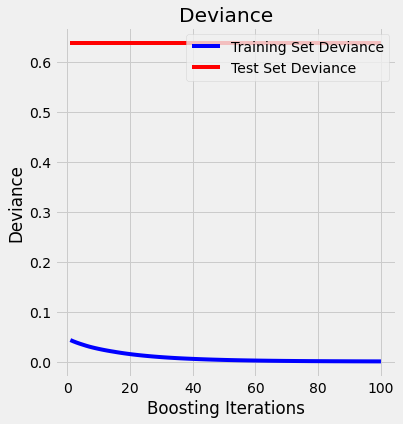

In [141]:
# computing test set deviance
test_score = np.zeros((paramsGB['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbc.staged_predict(X)):
    test_score[i] = gbc.loss_(y, y_pred_gbc)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(paramsGB['n_estimators']) + 1, gbc.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(paramsGB['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

The model I trust the most is the Gradient Boost model because it had a higher accuracy improvement and distribution of True Positives and Negatives based on the confusion matrix.Additionally, I trust it more because I have gone further to reduce its overfitting by reducing the max_depth to 5 and the learning rate to less than 0.1.

## B. Support Vector Machine

For SVM, I chose to work with two features namely FTI and TSH from Feature Importance Graph.Plotting the two features to see if they are appropriate for SVM.

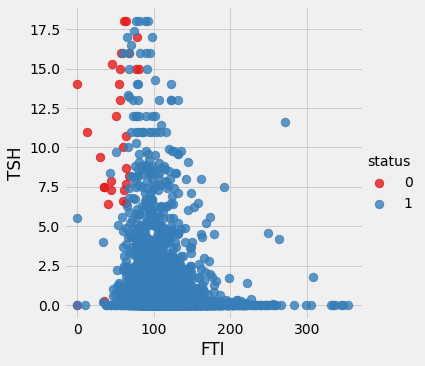

In [142]:
# Plot the point to visually see where the point lies
sns.lmplot('FTI', 'TSH', data=final_dataset2, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [145]:
#Splitting the data
X = final_dataset2.drop(['status'],axis=1)
X = X[['FTI','TSH']] 
y = np.where(final_dataset2['status']== 0,0,1)  #Hypothyroid being 0 since I had already converted to numerical during data prepaparion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

 # Standardising the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###### Kernel Functions

In [146]:
#Creating the three kernel function models and fitting our data with the parameters inserted

poly = SVC(kernel='poly', gamma=1,degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
linear = SVC(kernel='linear', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)


In [147]:
#Predictions, Metrics and Evaluation
y_pred_poly = poly.predict(X_test)
y_pred_linear = linear.predict(X_test)
y_pred_rbf = rbf.predict(X_test)


#Performance and Evaluation

print("Poly Accuracy:",metrics.accuracy_score(y_test,y_pred_poly)) 
print('Poly MSE:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Poly RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print(confusion_matrix(y_test, y_pred_poly))

print("linear Accuracy:",metrics.accuracy_score(y_test,y_pred_linear)) 
print('linear MSE:', metrics.mean_squared_error(y_test, y_pred_linear))  
print('linear RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print(confusion_matrix(y_test, y_pred_linear))

print("rbf Accuracy:",metrics.accuracy_score(y_test,y_pred_rbf)) 
print('rbf MSE:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('rbf RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))
print(confusion_matrix(y_test, y_pred_rbf))

Poly Accuracy: 0.9924242424242424
Poly MSE: 0.007575757575757576
Poly RMSE: 0.08703882797784893
[[  3   4]
 [  0 521]]
linear Accuracy: 0.9867424242424242
linear MSE: 0.013257575757575758
linear RMSE: 0.11514154661795957
[[  0   7]
 [  0 521]]
rbf Accuracy: 0.9867424242424242
rbf MSE: 0.013257575757575758
rbf RMSE: 0.11514154661795957
[[  0   7]
 [  0 521]]


From the results, Polynomial Kernel seems to be wroking Best.

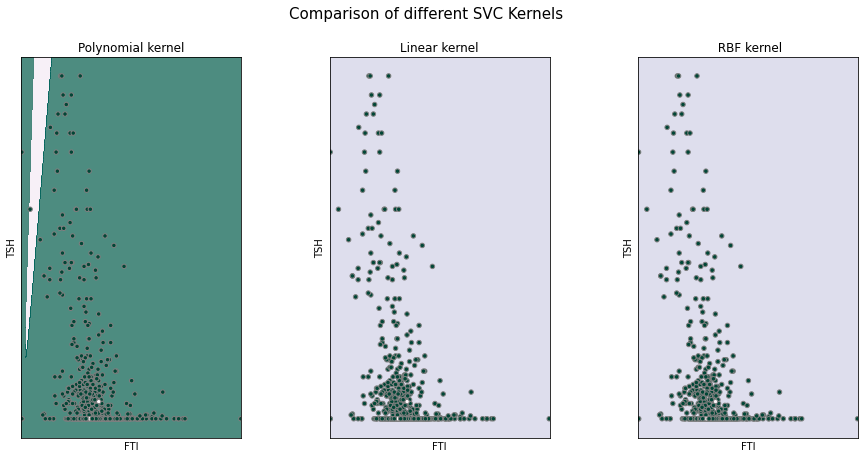

In [43]:
# Visualisation and creating a mesh grid for our graph
#instantiating our  stepsize in the mesh, it alters the accuracy of the plotprint

h = .02

# Creating models' arrays 
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']

def make_meshgrid(x, y, h=h):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 1x3 grid for plotting.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Comparison of different SVC Kernels', fontsize = 15)

# title for the plots
titles = ('Polynomial kernel', 'Linear kernel', ' RBF kernel')

# Selecting 200 datapoints to plot, so thats its the same size for x and y 
X = final_dataset2[['FTI', 'TSH']].iloc[:528, :].values
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, axes.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.PuBuGn, alpha=0.7)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.PuBuGn, s=20, edgecolors='grey')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('FTI')
    ax.set_ylabel('TSH')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

## 8. Challenging the solution

Theres a high chance the models are overfitted probably due to the dataset being imbalanced. A good model to try out would be Ada Boost and see whether it would work best with this dataset.  


## 9. Follow up questions

### a). Did we have the right data?

The data had the right features but the population distribution of hypothyroid cases was uneven making the data more biased towards negative cases. Hence, the data was not the right fit.

### b). Do we need other data to answer our question?

Yes, we need additional records of positive cases.

### c). Did we have the right question?

The question was okay.
